# Caso Estudio 2 Johan Caro


#Install

In [ ]:
!pip3 install Tensorflow
!pip install scikeras

##Libraries


In [ ]:
# Core
import pandas as pd
import numpy as np
import sklearn
import math

# Tensorflow
import tensorflow
from tensorflow import keras
from keras import layers,models
from scikeras.wrappers import KerasClassifier, KerasRegressor
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# Preprocessing
from sklearn.preprocessing import StandardScaler, Normalizer, OneHotEncoder, LabelEncoder, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PolynomialFeatures
from imblearn.over_sampling import SMOTE

# Models - Clasificación
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score,RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Visualization
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from ipywidgets import interact, widgets
from IPython.display import display, Markdown

##Funciones

In [ ]:
def encodeLabel(dataframe, columnas):
  le = LabelEncoder()
  for i in columnas:
    dataframe[i] = le.fit_transform(dataframe[i])

In [ ]:
def correlacion_matrix(data, column, porcentajeCorrelacion):
  corr_matrix = data.corr()

  top_corr_features = corr_matrix.index[abs(corr_matrix[column]) >= porcentajeCorrelacion]


  plt.figure(figsize=(10, 6))
  sns.heatmap(data[top_corr_features].corr(), annot=True, cmap="coolwarm")

  plt.title(f'Matriz de Correlación de las Variables mas correlacionadas con {column}')
  plt.show()

In [ ]:
def splitData(dataframe, columnY):
  X = dataframe.drop([columnY], axis = 1)
  y = dataframe[columnY]

  return X, y


def trainTest(X, y, testSize, randomState):
  X_train, X_test, y_train, y_test = train_test_split(X ,y , test_size = testSize, random_state = randomState)

  return X_train, X_test, y_train, y_test

def estandarReturnSC(x_train, x_test):
  sc = StandardScaler()
  X_train_sc = sc.fit_transform(x_train)
  X_test_sc = sc.transform(x_test)

  return X_train_sc, X_test_sc, sc

## Load Dataset

In [ ]:
data = pd.read_csv('nasa.csv')
data.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True


## Preprocessing Datast

In [ ]:
categorias = data['Equinox'].value_counts()
print(categorias)

J2000    4687
Name: Equinox, dtype: int64


In [ ]:
#eliminar Neo Reference ID, Nmae, Close Approach Date, Orbit Determination Date al ser valores unicos y eliminar Equinox , Orbiting Body al todos tener el mismo valor
datav1 = data.drop(['Neo Reference ID', 'Name', 'Equinox', 'Orbit Determination Date', 'Close Approach Date', 'Orbiting Body'], axis = 1)

In [ ]:
datav1.head()

,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),Epoch Date Close Approach,...,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Hazardous
0,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,788947200000,...,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,True
1,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,1071.581063,788947200000,...,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,False
2,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,1698.341531,789552000000,...,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,True
3,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,64.569144,790156800000,...,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,False
4,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,790156800000,...,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,True


In [ ]:
datav1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Absolute Magnitude            4687 non-null   float64
 1   Est Dia in KM(min)            4687 non-null   float64
 2   Est Dia in KM(max)            4687 non-null   float64
 3   Est Dia in M(min)             4687 non-null   float64
 4   Est Dia in M(max)             4687 non-null   float64
 5   Est Dia in Miles(min)         4687 non-null   float64
 6   Est Dia in Miles(max)         4687 non-null   float64
 7   Est Dia in Feet(min)          4687 non-null   float64
 8   Est Dia in Feet(max)          4687 non-null   float64
 9   Epoch Date Close Approach     4687 non-null   int64  
 10  Relative Velocity km per sec  4687 non-null   float64
 11  Relative Velocity km per hr   4687 non-null   float64
 12  Miles per hour                4687 non-null   float64
 13  Mis

Convertir booleano a 1 y 0

In [ ]:
encodeLabel(datav1, ['Hazardous'])

In [ ]:
datav1.head()

,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),Epoch Date Close Approach,...,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Hazardous
0,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,788947200000,...,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,1
1,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,1071.581063,788947200000,...,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,0
2,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,1698.341531,789552000000,...,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,1
3,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,64.569144,790156800000,...,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,0
4,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,790156800000,...,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,1


Datos Nulos

In [ ]:
datav1.isnull().sum()

Absolute Magnitude              0
Est Dia in KM(min)              0
Est Dia in KM(max)              0
Est Dia in M(min)               0
Est Dia in M(max)               0
Est Dia in Miles(min)           0
Est Dia in Miles(max)           0
Est Dia in Feet(min)            0
Est Dia in Feet(max)            0
Epoch Date Close Approach       0
Relative Velocity km per sec    0
Relative Velocity km per hr     0
Miles per hour                  0
Miss Dist.(Astronomical)        0
Miss Dist.(lunar)               0
Miss Dist.(kilometers)          0
Miss Dist.(miles)               0
Orbit ID                        0
Orbit Uncertainity              0
Minimum Orbit Intersection      0
Jupiter Tisserand Invariant     0
Epoch Osculation                0
Eccentricity                    0
Semi Major Axis                 0
Inclination                     0
Asc Node Longitude              0
Orbital Period                  0
Perihelion Distance             0
Perihelion Arg                  0
Aphelion Dist 

No hay datos Nulos

Matrix de confusion

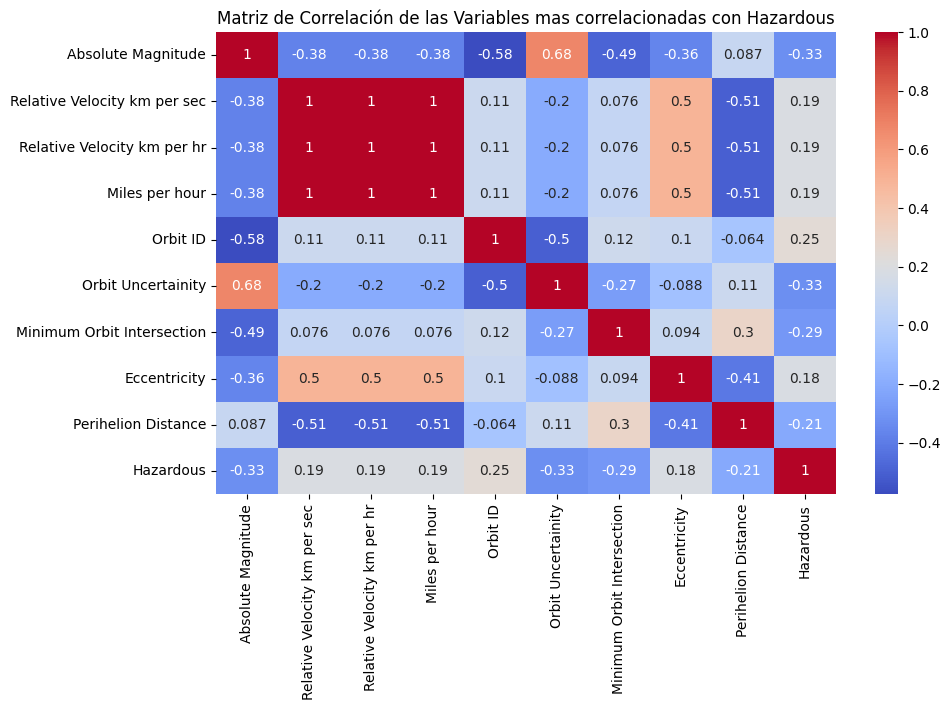

In [ ]:
correlacion_matrix(datav1, 'Hazardous', 0.15)

Relative Velocity escogemos solo una al ser dependientes y dar la misma informacion

## Insights

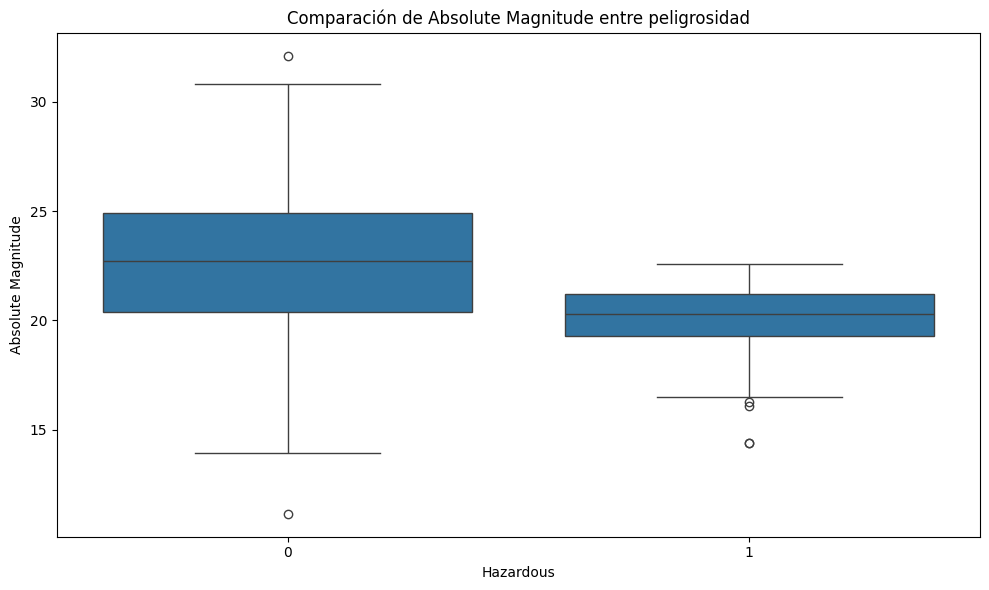

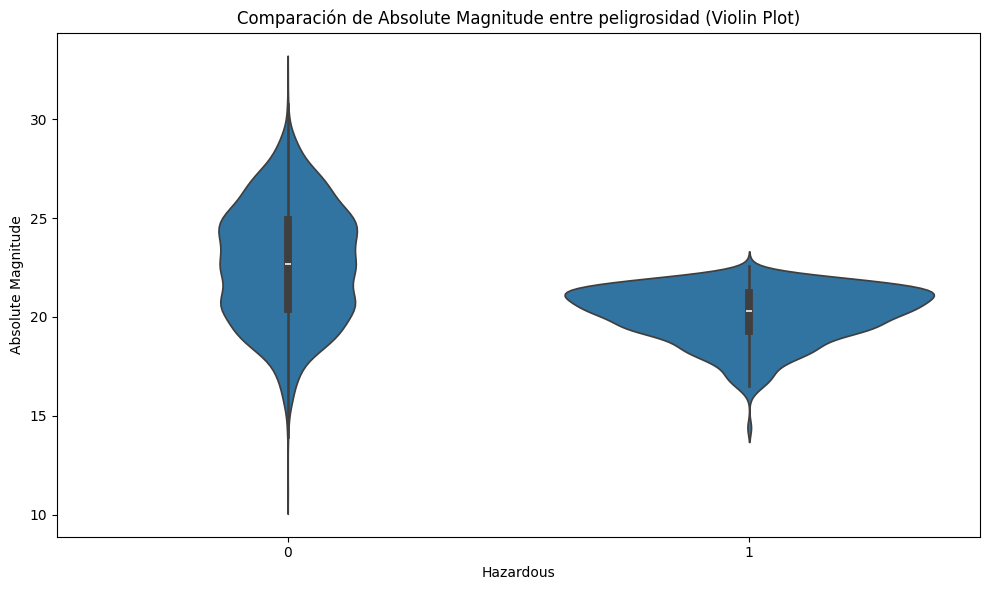

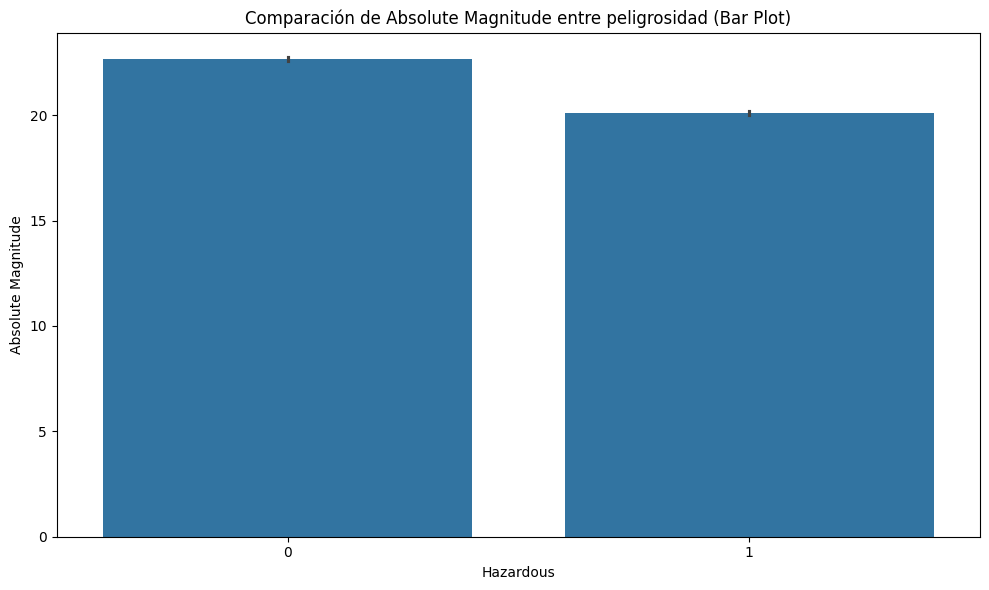

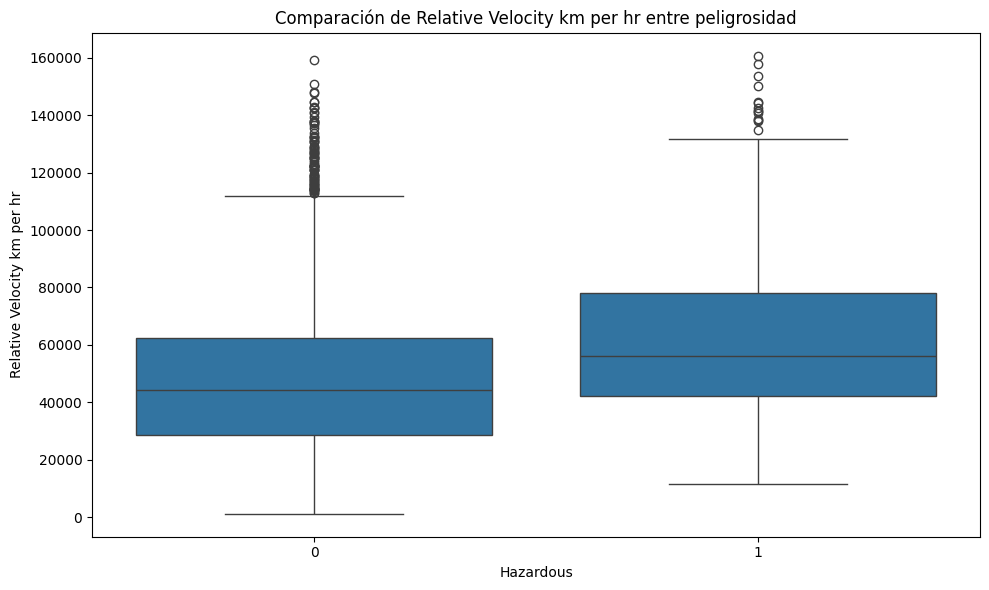

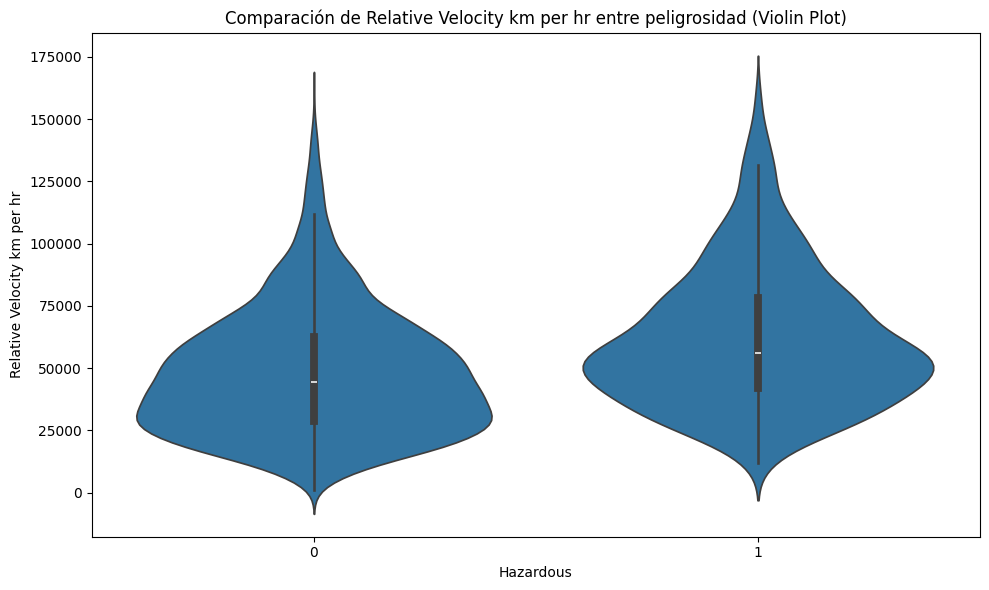

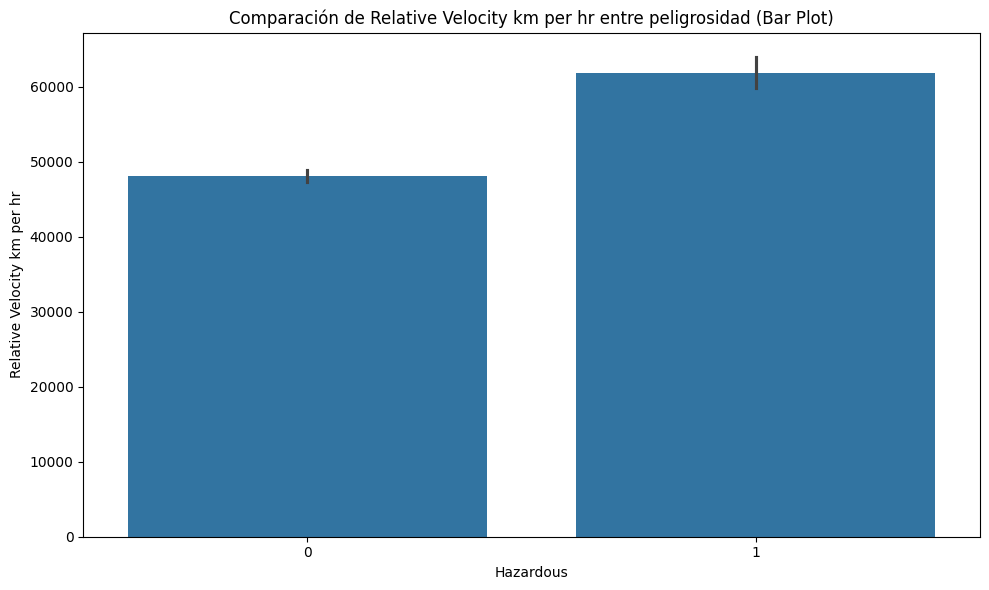

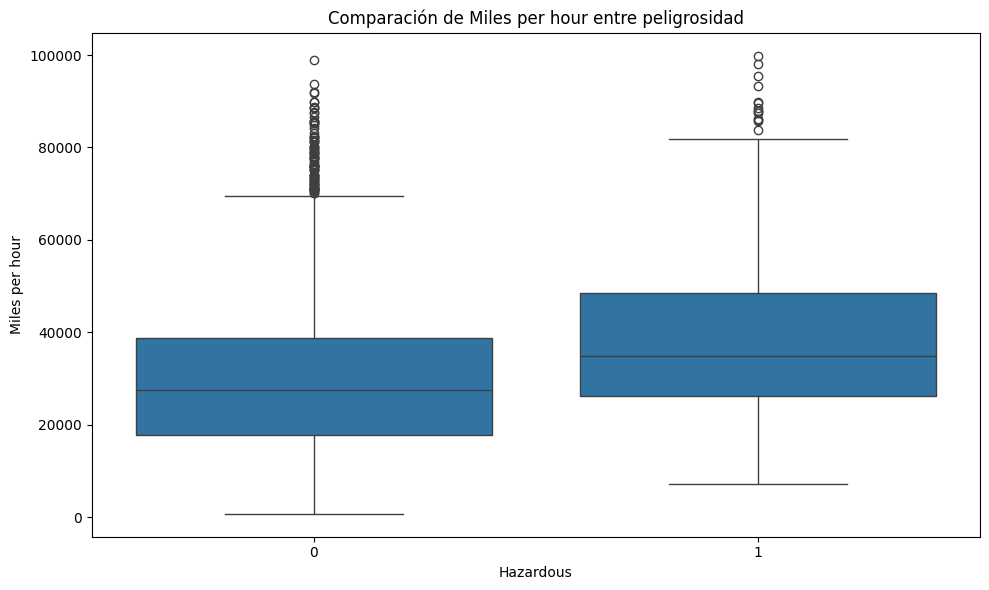

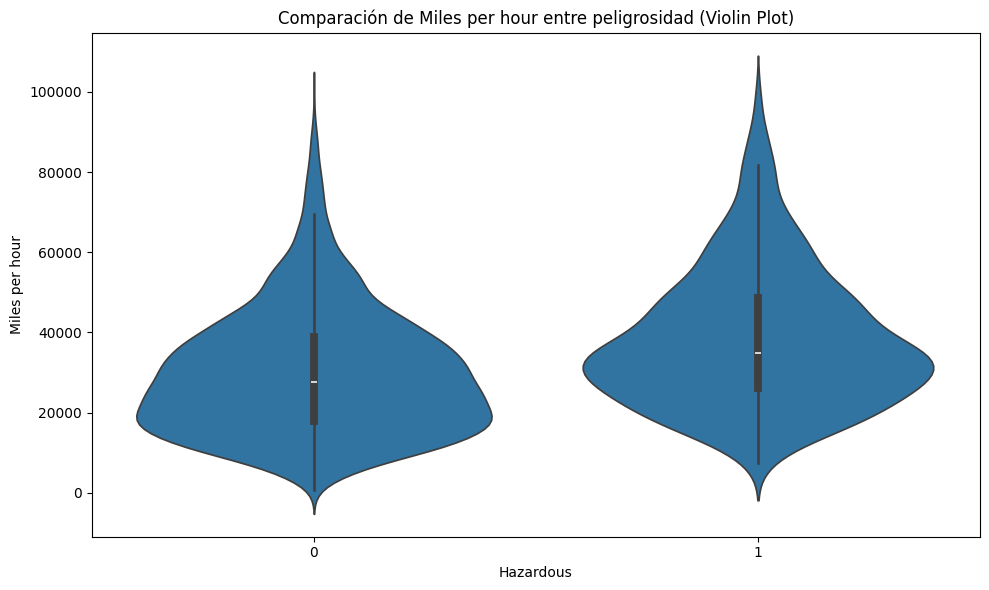

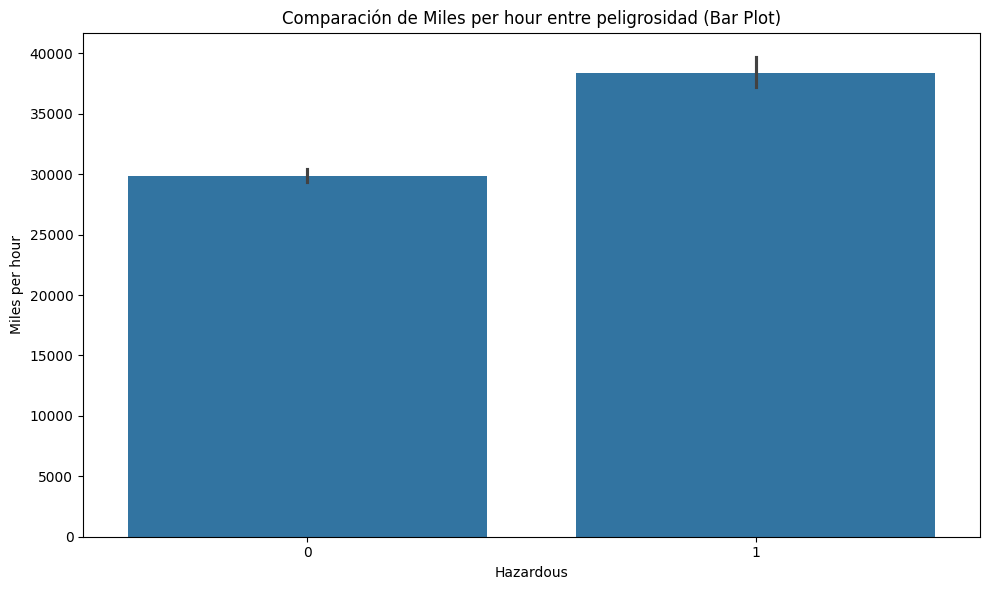

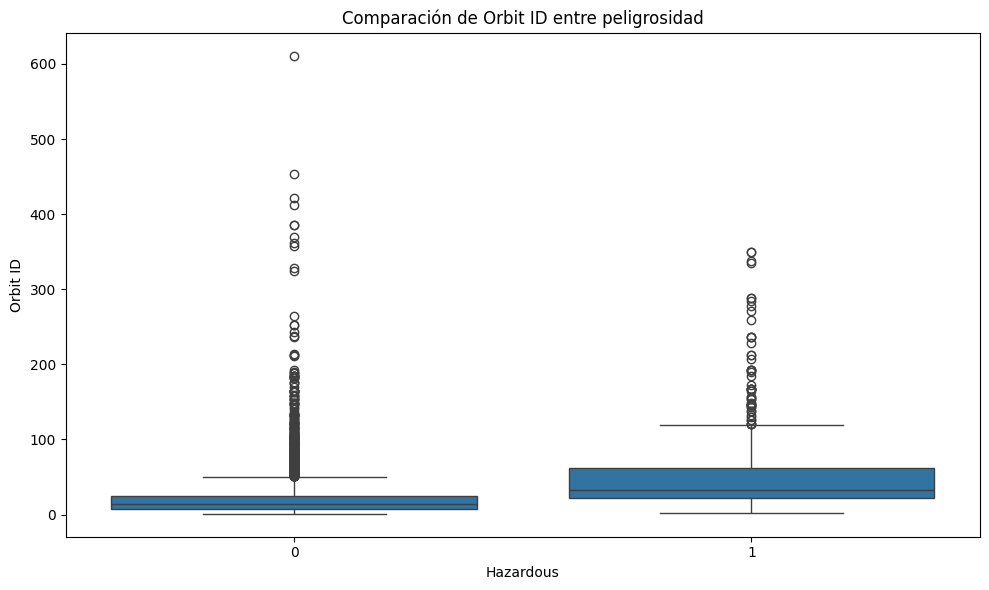

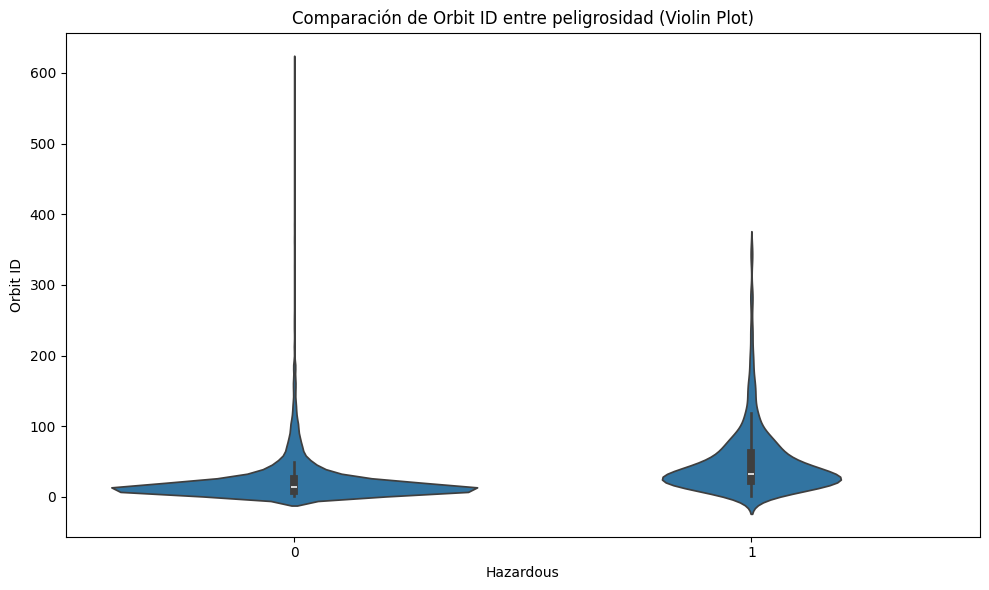

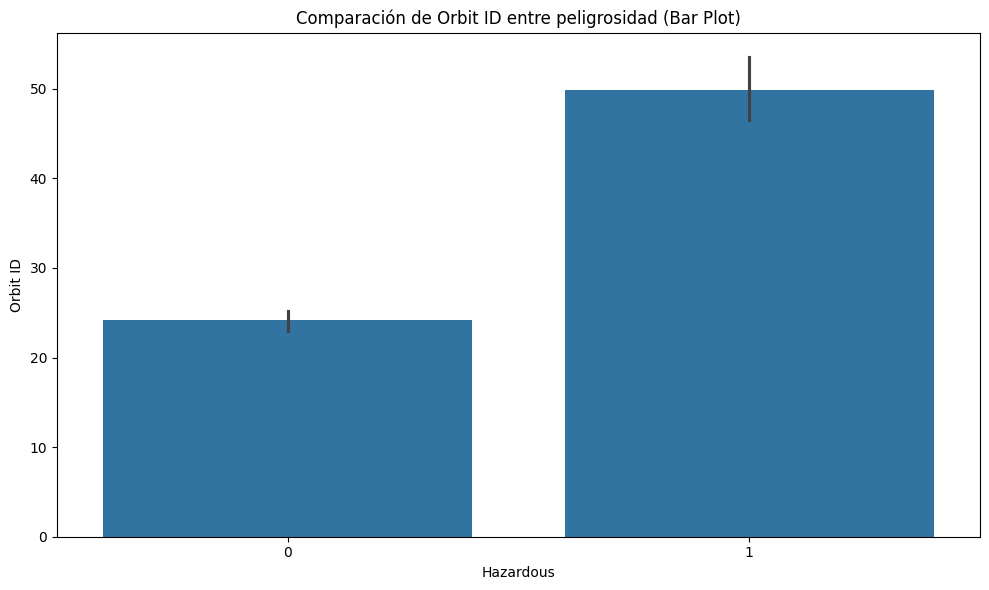

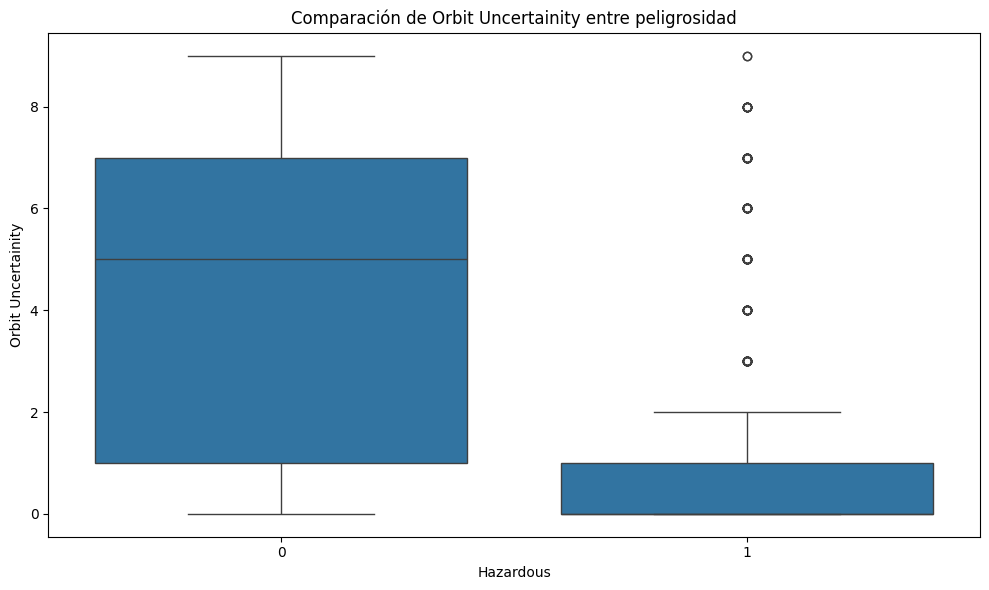

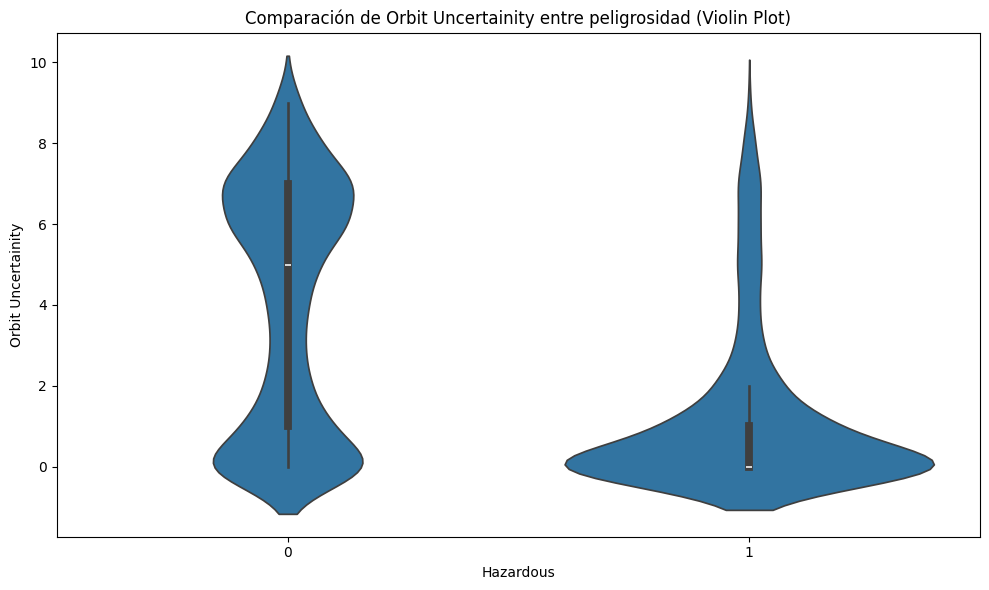

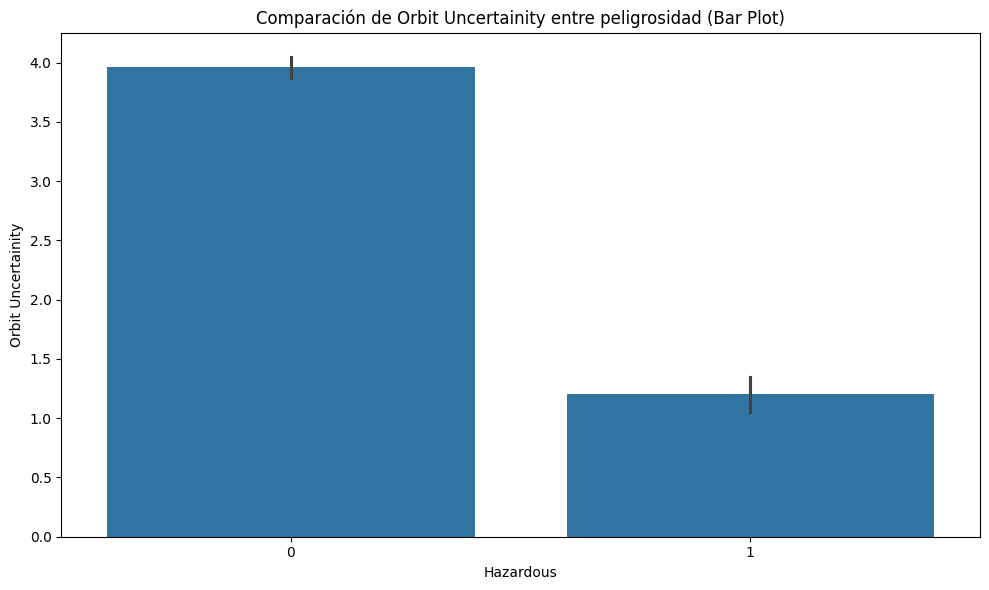

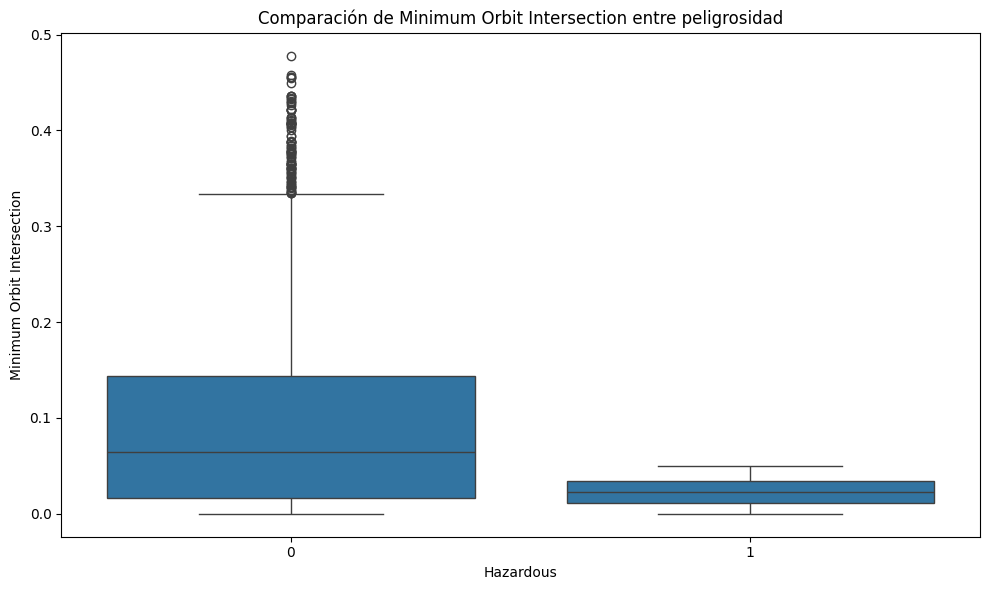

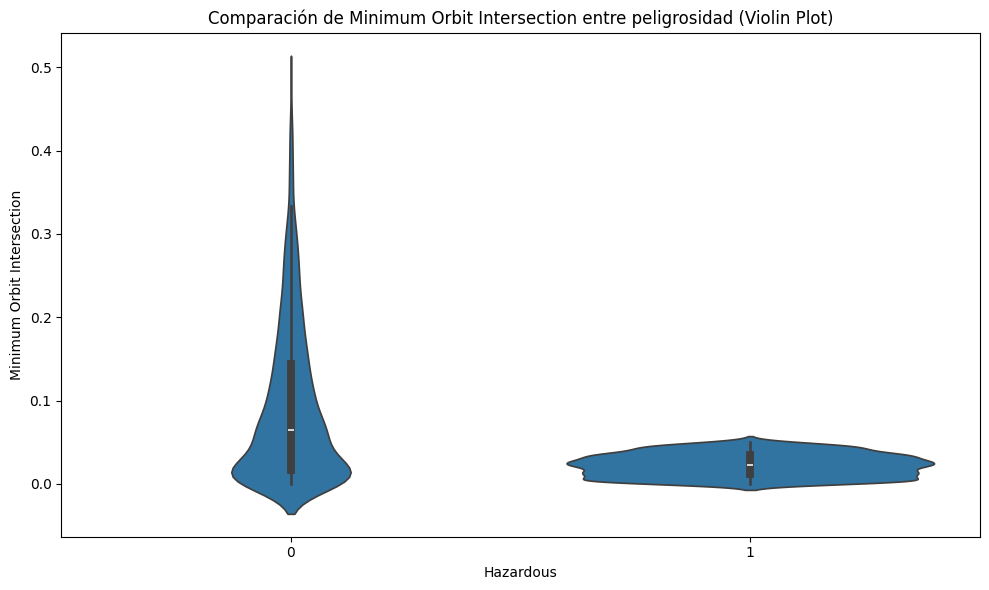

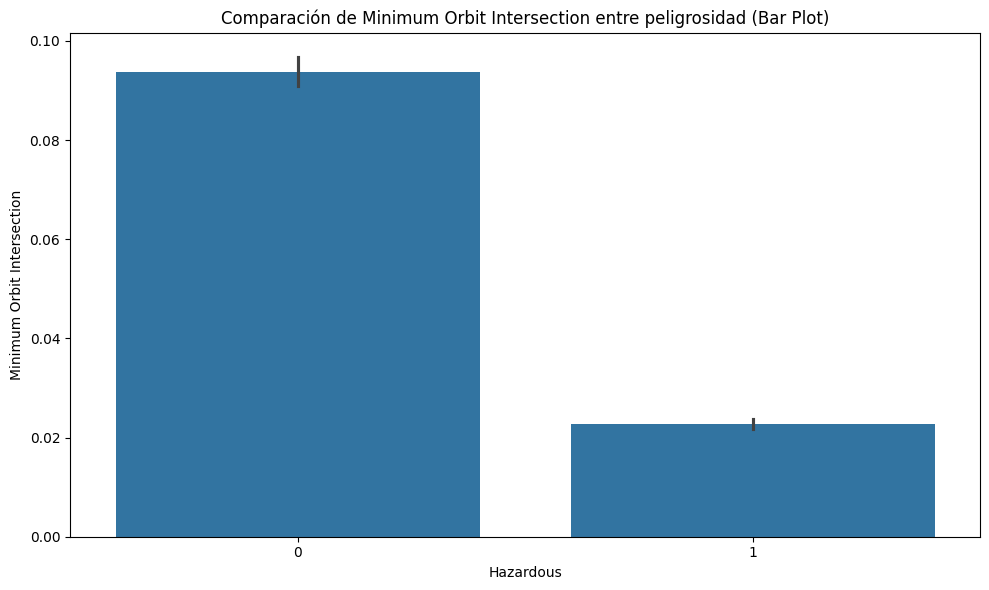

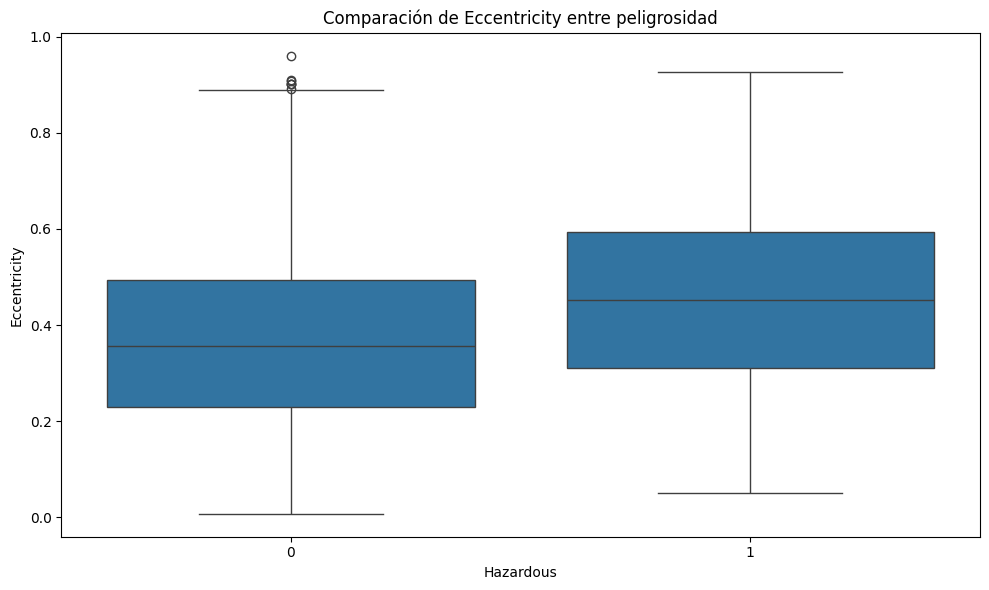

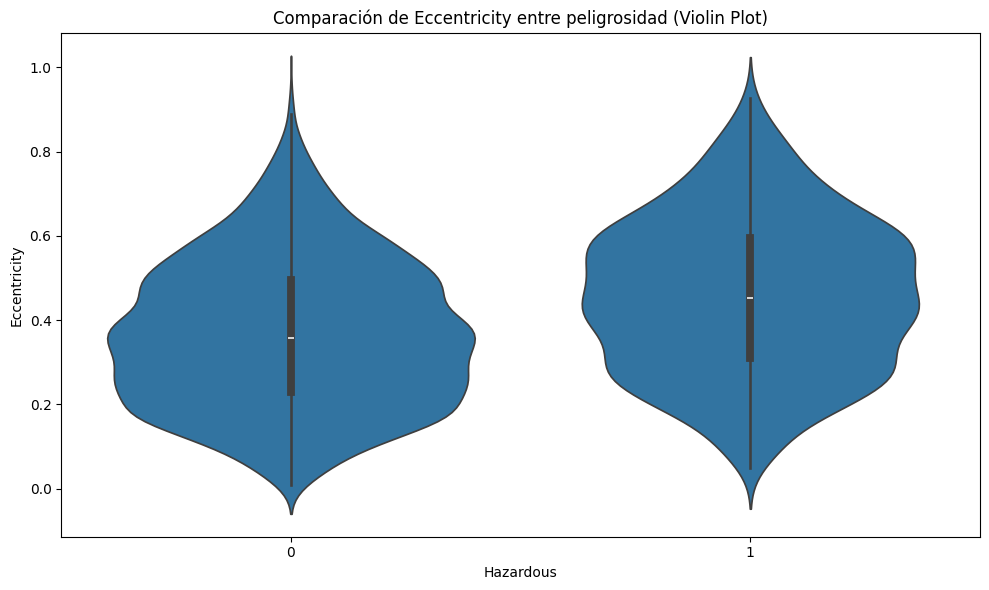

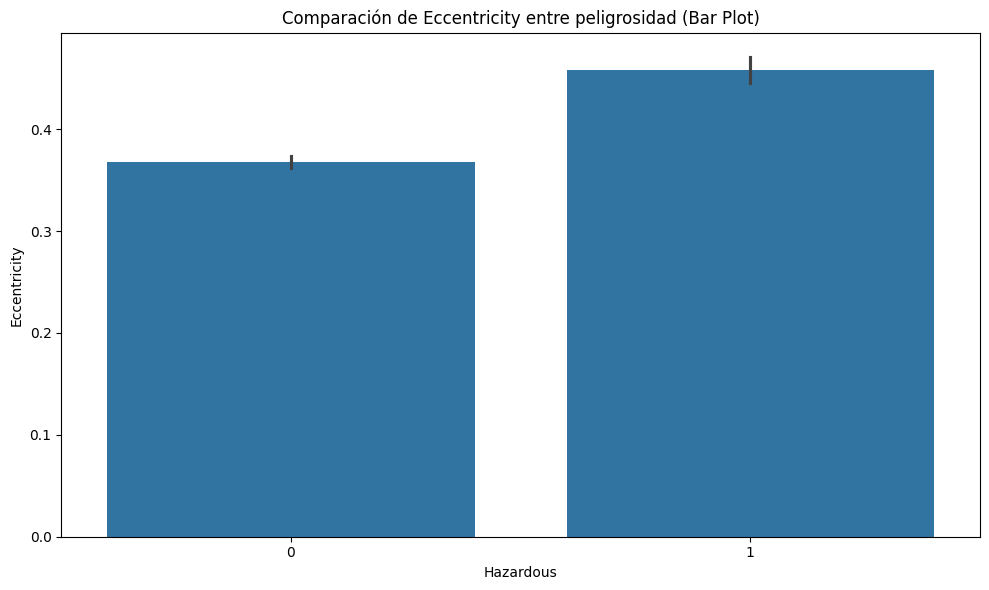

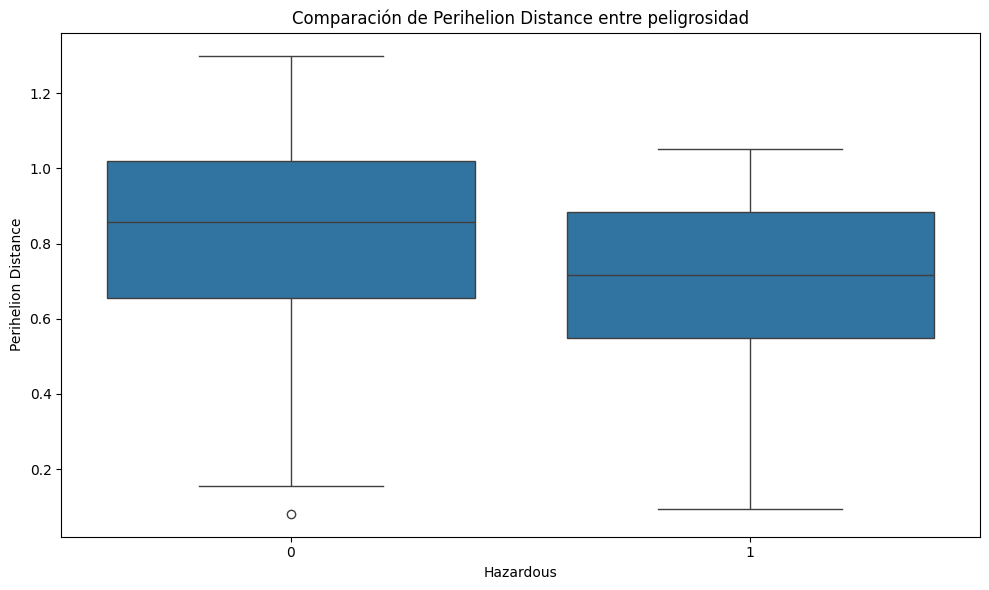

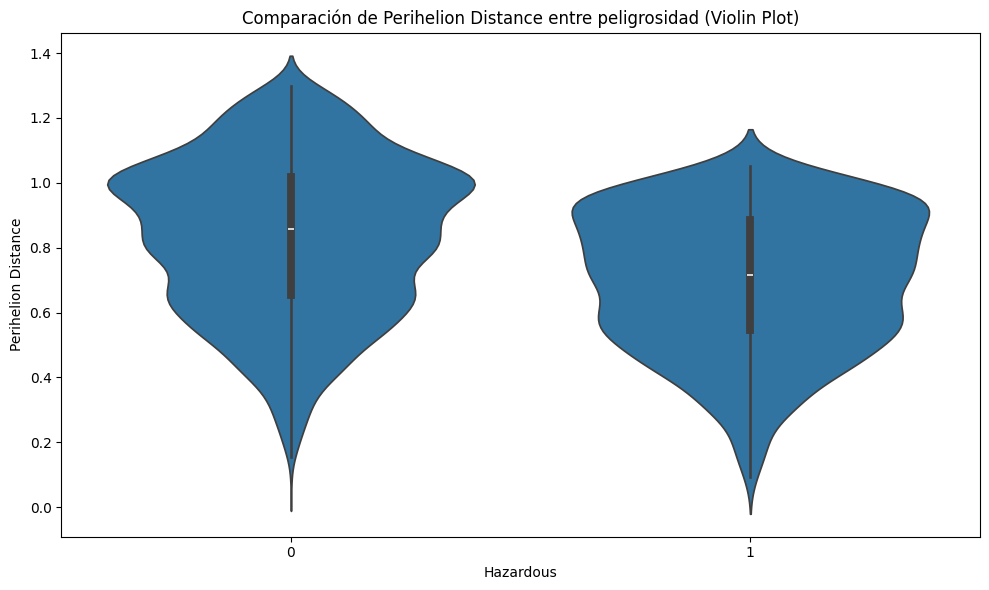

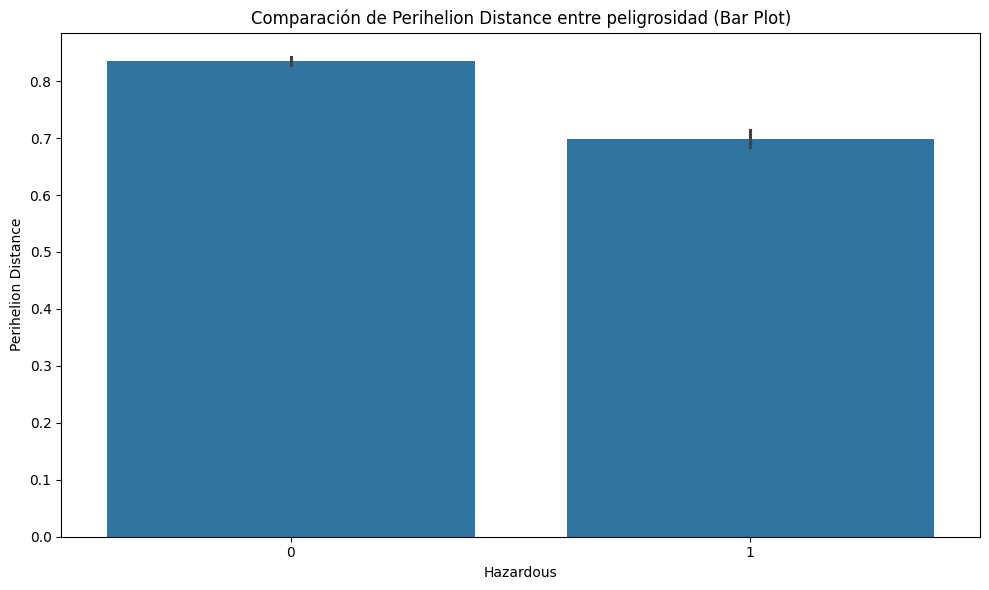

In [ ]:
caracteristicas = ['Absolute Magnitude', 'Relative Velocity km per hr', 'Miles per hour', 'Orbit ID', 'Orbit Uncertainity', 'Minimum Orbit Intersection',
                   'Eccentricity', 'Perihelion Distance']
caracteristicas_seleccionadas = caracteristicas

for caracteristica in caracteristicas:
    #Diagrama boxplot
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Hazardous', y=caracteristica, data=datav1)
    plt.title(f'Comparación de {caracteristica} entre peligrosidad')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()
    #diagrama de violin
    plt.figure(figsize=(10, 6))
    sns.violinplot(x='Hazardous', y=caracteristica, data=datav1)
    plt.title(f'Comparación de {caracteristica} entre peligrosidad (Violin Plot)')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

    # Diagrama de barras
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Hazardous', y=caracteristica, data=datav1)
    plt.title(f'Comparación de {caracteristica} entre peligrosidad (Bar Plot)')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

## Data final

In [ ]:
data_final = datav1[['Absolute Magnitude', 'Relative Velocity km per hr', 'Miles per hour', 'Orbit ID', 'Orbit Uncertainity', 'Minimum Orbit Intersection',
                   'Eccentricity', 'Perihelion Distance', 'Hazardous']]

In [ ]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Absolute Magnitude           4687 non-null   float64
 1   Relative Velocity km per hr  4687 non-null   float64
 2   Miles per hour               4687 non-null   float64
 3   Orbit ID                     4687 non-null   int64  
 4   Orbit Uncertainity           4687 non-null   int64  
 5   Minimum Orbit Intersection   4687 non-null   float64
 6   Eccentricity                 4687 non-null   float64
 7   Perihelion Distance          4687 non-null   float64
 8   Hazardous                    4687 non-null   int64  
dtypes: float64(6), int64(3)
memory usage: 329.7 KB


#Split the Data

In [ ]:
X, y = splitData(data_final, 'Hazardous')

In [ ]:
X_train, X_test, y_train, y_test = trainTest(X, y, 0.14, 42)

Estandarizar datos

In [ ]:
sc= StandardScaler()

X_train_sc= sc.fit_transform(X_train)

X_test_sc= sc.transform(X_test)

Verificamos la calidad de la data elegida usando un random forest para ver si todas las caracteristicas elegidas son importantes

In [ ]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_sc, y_train)
feature_importances = pd.DataFrame(clf.feature_importances_, index=X_train.columns, columns=['importance'])
selected_features = feature_importances[feature_importances['importance'] > 0.05].index.tolist()

In [ ]:
selected_features

['Absolute Magnitude',
 'Orbit ID',
 'Orbit Uncertainity',
 'Minimum Orbit Intersection']

El random Forest nos dice que estas son las 4 caracteristicas mas trascendentes, esta informacion sera util para el reporte final

#Random Forest Classification

In [ ]:
randonBosque = RandomForestClassifier(n_estimators = 1000, criterion = 'entropy', random_state = 42)
randonBosque.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=1000, random_state=42)

In [ ]:
Y_pred1 = randonBosque.predict(X_test)

In [ ]:
print(Y_pred1)

[1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 1 1 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1
 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0
 0 0 1 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 

### Metricas Modelo Random Forest

In [ ]:
print(classification_report(y_test, Y_pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       550
           1       0.98      1.00      0.99       107

    accuracy                           1.00       657
   macro avg       0.99      1.00      0.99       657
weighted avg       1.00      1.00      1.00       657



In [ ]:
print(accuracy_score(y_test,Y_pred1))

0.9969558599695586


##KNN

In [ ]:
distancia = []
for i in range(2,15):
  knprueba = KNeighborsClassifier(n_neighbors= i)
  knprueba.fit(X_train_sc, y_train)
  distancia.append(knprueba.score(X_test_sc,y_test))

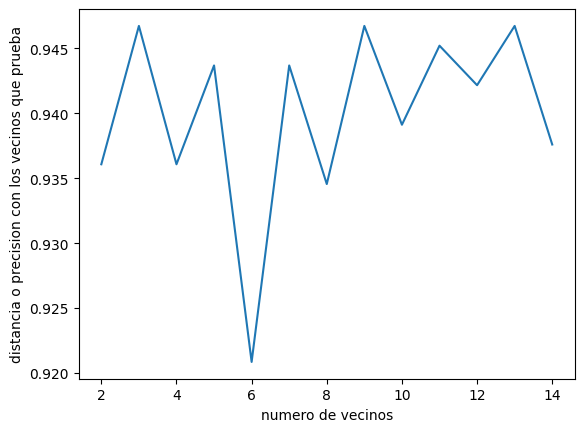

In [ ]:
plt.plot(range(2,15), distancia)
plt.xlabel('numero de vecinos')
plt.ylabel('distancia o precision con los vecinos que prueba')
plt.show()

3 Vecinos es lo mejor segun la grafica

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train_sc, y_train)
y_pred2 = knn.predict(X_test_sc)

### Metricas Modelo KNN

In [ ]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       550
           1       0.85      0.82      0.83       107

    accuracy                           0.95       657
   macro avg       0.91      0.90      0.90       657
weighted avg       0.95      0.95      0.95       657



In [ ]:
print(accuracy_score(y_test,y_pred2))

0.9467275494672754


## Deep Learning

Datos de Validacion

In [ ]:
X_val, X_test_val, y_val, y_test_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

Hiperparametros

In [ ]:
activaciones = ['relu', 'sigmoid']
num_neuronas = [8, 16 ,32, 64, 128]
batch_sizes = [16,32, 64]
optimizadores = ['adam', 'sgd']

In [ ]:
mejor_accuracy = 0
mejores_parametros = {}

iteracion de los modelos con los hiperparametros

In [ ]:
for activacion in activaciones:
    for num_neurona in num_neuronas:
        for batch_size in batch_sizes:
            for optimizador in optimizadores:

                modelo = Sequential([
                    Dense(num_neurona, activation=activacion, input_shape=(X_train.shape[1],)),
                    Dense(1, activation='sigmoid')
                ])


                modelo.compile(optimizer=optimizador, loss='binary_crossentropy', metrics=['accuracy'])

                modelo.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=batch_size, verbose=0)


                loss, accuracy = modelo.evaluate(X_test_val, y_test_val)

                if accuracy > mejor_accuracy:
                    mejor_accuracy = accuracy
                    mejores_parametros = {
                        'activacion': activacion,
                        'num_neuronas': num_neurona,
                        'batch_size': batch_size,
                        'optimizador': optimizador
                    }
                    mejor_modelo = modelo

11/11 [==============================] - 0s 3ms/step - loss: 0.4660 - accuracy: 0.8237


In [ ]:
print("Mejores hiperparámetros encontrados:")
print(mejores_parametros)
print("Precisión del mejor modelo en el conjunto de prueba:", mejor_accuracy)

Mejores hiperparámetros encontrados:
{'activacion': 'relu', 'num_neuronas': 64, 'batch_size': 16, 'optimizador': 'adam'}
Precisión del mejor modelo en el conjunto de prueba: 0.826747715473175


### Corremos por separado el mejor modelo

In [ ]:
modelo = Sequential([
                    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
                    keras.layers.Dense(32, activation='relu'),
                    keras.layers.Dense(16, activation='relu'),
                    keras.layers.Dense(4, activation='relu'),
                    Dense(1, activation='sigmoid')
                ])


modelo.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

modelo.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=16, verbose=0)


loss, accuracy = modelo.evaluate(X_test_val, y_test_val)

11/11 [==============================] - 0s 2ms/step - loss: 0.4666 - accuracy: 0.8237


###Metricas Deep Learning

In [ ]:
Y_pred3 = modelo.predict(X_test)

21/21 [==============================] - 1s 5ms/step


In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, Y_pred3)
roc_auc = auc(fpr, tpr)

In [ ]:
print(roc_auc_score(y_test,Y_pred3))

0.5


In [ ]:
Y_pred3_rounde = (Y_pred3 >= roc_auc_score(y_test,Y_pred3)).astype(int)

In [ ]:
print(classification_report(y_test, Y_pred3_rounde))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       550
           1       0.00      0.00      0.00       107

    accuracy                           0.84       657
   macro avg       0.42      0.50      0.46       657
weighted avg       0.70      0.84      0.76       657



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(accuracy_score(y_test,Y_pred3_rounde))

0.837138508371385


# Estrateagias para mejorar la deteccion y clasificacion de lo asteroides



1. Por el analisis realizado con el Random Forest las variables mas importantes para estudiar la peligrosidad de los asteroides son estas 4

* Absolute Magnitude
* Orbit ID
* Orbit Uncertainity
* Minimum Orbit Intersection

  por lo tanto estas deberian ser las principales variables a tener en cuenta a la hora de realziar un estudio.

2.  Podemos observar que el estudio de las orbitas es vital para la clasificacin de los asteroides por lo tanto una buena estrategia seria centrar una gra parte de la investigacion al estudio de las orbitas.

3. Aunque en un incio se pudo observar que la velocidad del asteroide podia ser un factor de riesgo grande al final el modelo decidio desecharlo por lo tanto al ser una variable peligrosa por que la velocidad disminuye el tiempo de reaccion no es tan catastrofica, por lo tanto siempre sera mejor enfocarse en la orbita